## 1. IMPORT LIBRARIES & FETCH DATA

In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, f1_score

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y_raw = heart_disease.data.targets 

print("Data fetched successfully.")

Data fetched successfully.


## 2. PREPROCESSING

In [2]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

X = pd.DataFrame(X_imputed, columns=X.columns)
print("Missing values handled using median imputation.")

y = y_raw['num'].apply(lambda x: 1 if x > 0 else 0)
print("Target variable converted to binary (0 = no disease, 1 = has disease).")

Missing values handled using median imputation.
Target variable converted to binary (0 = no disease, 1 = has disease).


## 3. DATA SPLITTING & SCALING

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")

Training data shape: (242, 13)
Testing data shape: (61, 13)


## 4. Train & Evaluate

  Accuracy: 0.9180
  Recall (Key Metric): 0.9062
  Precision: 0.9355
  F1-Score: 0.9206


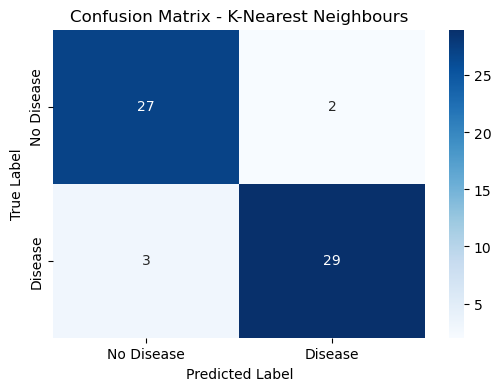

In [4]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"  Accuracy: {accuracy_knn:.4f}")
print(f"  Recall (Key Metric): {recall_knn:.4f}")
print(f"  Precision: {precision_knn:.4f}")
print(f"  F1-Score: {f1_knn:.4f}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - K-Nearest Neighbours')
plt.show()

## 5. CHOOSE & SAVE THE BEST MODEL

In [5]:
best_model = model_knn
best_model_name = "K-Nearest Neighbours"
try:
    best_model_name
    print(f"Selected Best Model: {best_model_name}")

    joblib.dump(best_model, 'best_model.joblib')
    joblib.dump(scaler, 'scaler.joblib')
    joblib.dump(imputer, 'imputer.joblib')

    print("Successfully saved 'best_model.joblib', 'scaler.joblib', and 'imputer.joblib'.")

except NameError:
    print("No model was saved.")

Selected Best Model: K-Nearest Neighbours
Successfully saved 'best_model.joblib', 'scaler.joblib', and 'imputer.joblib'.
